In [1]:
# ライブラリ
import urllib  #HTMLにアクセス＆取得
from bs4 import BeautifulSoup #HTMLからデータ抽出
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

In [2]:
# スクレイピング
url = 'https://baseball-data.com/stats/hitter-all/hr-2.html'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

In [3]:
table = soup.find_all('table')[0] # HTMLから表部分を全て取得
rows = table.find_all('tr') # 表から行データを取得

In [4]:
# データ格納
head_data = []
player_data = []

for i, row in enumerate(rows):
    if i == 0: # 1行目
        for headerValue in row.find_all('th'):
            head_data.append(headerValue.get_text())
    elif (i > 0) and (i + 1 < len(rows)): # 2行目〜最終行未満
        player_row = []
        for playerValue in row.find_all('td'):
            player_row.append(playerValue.get_text())
        player_data.append(player_row)

In [6]:
# データフレーム型に変換
df = pd.DataFrame(data = player_data, columns = head_data)
df.head(10)

,順位,選手名,チーム,打率,試合,打席数,打数,安打,本塁打,打点,...,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27
0,1,岡本 和真,巨人,.297,83,349,296,88,20,51,...,44,5,64,0,7,.393,.557,.950,7.71,7.64
1,2,浅村 栄斗,楽天,.271,83,345,306,83,18,50,...,37,1,62,0,6,.351,.490,.841,6.13,6.09
2,3,村上 宗隆,ヤクルト,.242,83,351,293,71,16,49,...,50,5,109,0,2,.359,.451,.809,5.81,5.96
3,3,牧 秀悟,DeNA,.283,83,350,325,92,16,56,...,18,4,60,0,9,.326,.498,.824,5.43,5.37
4,5,万波 中正,日本ハム,.262,83,335,309,81,15,42,...,19,3,77,2,6,.309,.482,.792,5.06,5.01
5,6,柳田 悠岐,ソフトバンク,.305,82,357,302,92,14,48,...,44,8,56,0,4,.403,.510,.913,7.85,7.69
6,6,オスナ,ヤクルト,.248,83,334,298,74,14,43,...,33,1,57,0,9,.323,.436,.760,4.61,4.63
7,8,宮﨑 敏郎,DeNA,.347,75,269,236,82,13,48,...,24,5,26,0,9,.413,.602,1.014,8.68,8.31
8,9,近藤 健介,ソフトバンク,.289,82,356,287,83,12,49,...,63,2,66,0,5,.416,.484,.900,7.54,7.46
9,9,細川 成也,中日,.285,81,334,302,86,12,49,...,27,5,100,0,9,.353,.487,.840,5.89,5.65


In [7]:
df.shape

(50, 21)

In [8]:
# CSV出力
df.to_csv('2023_playerdata.csv', header=True, index=False)

In [9]:
# CSV読み込み
df = pd.read_csv('2023_playerdata.csv')

In [10]:
# 中日以外の11球団データを抽出
df11 = df[df['チーム'] != '中日']
# 中日のデータを抽出
df_d = df[df['チーム'] == '中日']

In [11]:
# 本塁打との相関係数
df_homerun = pd.DataFrame(df11.corr()['本塁打'])
df_homerun

,本塁打
順位,-0.947158
打率,0.315091
試合,0.434703
打席数,0.513441
打数,0.483389
安打,0.534056
本塁打,1.000000
打点,0.768631
盗塁,-0.131752
四球,0.462147


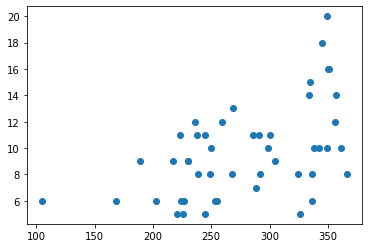

In [12]:
# 可視化（相関高い長打率）
plt.scatter(x = df11['打席数'], y = df11['本塁打'])
plt.show()

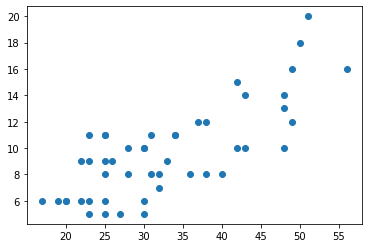

In [13]:
# 可視化（相関高い打点）
plt.scatter(x = df11['打点'], y = df11['本塁打'])
plt.show()

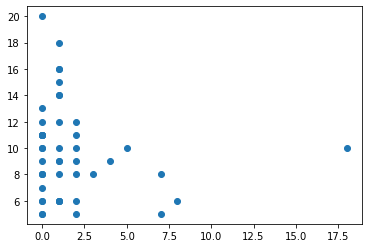

In [14]:
# 可視化（相関低い盗塁）
plt.scatter(x = df11['盗塁'], y = df11['本塁打'])
plt.show()

In [15]:
# 相関係数が0.7以上の項目を抽出
x_columns = df_homerun[df_homerun['本塁打'] >= 0.7].index.tolist()
# x_columnsに塁打、三塁打、二塁打、単打を渡してみる
#x_columns = ['安打', '二塁打', '三塁打', '塁打']
# 目的変数を除外
x_columns.remove('本塁打')

In [16]:
# 相関係数0.7以上の説明変数確認
x_columns

['打点']

In [17]:
# 説明変数と目的変数を定義
X = df11[x_columns]
y = df11['本塁打']

モデル作成・評価

In [18]:
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# モデルの学習
lr = LR()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
# 予測値の算出
y_pred_test = lr.predict(X_test)
y_pred_test

array([ 7.82138547,  9.92118542,  6.5090105 ,  9.13376044, 14.12078531,
       15.95811026,  9.65871042,  7.03396049,  9.13376044,  7.29643548,
       11.23356038,  7.29643548])

In [20]:
# MSEの算出
mse_test = MSE(y_test, y_pred_test)
mse_test

4.735791852728673

In [21]:
# RMSEの算出
rmse_test = np.sqrt(mse_test)
rmse_test

2.17618745808551

予測

In [22]:
# 中日データ（説明変数）
x_d = df_d[x_columns]
# 予測本塁打数の算出
y_pred_d = lr.predict(x_d)
# 予測本塁打列の追加
df_d['予測本塁打'] = np.round(y_pred_d).astype(np.int32)
# 予測値と実測値との比較
df_dd = df_d[['選手名', '本塁打', '予測本塁打']]
df_dd = pd.DataFrame(df_dd)
df_dd

/var/folders/41/791kfl912mbb2ndn2ly5_y240000gn/T/ipykernel_4606/2401879782.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['予測本塁打'] = np.round(y_pred_d).astype(np.int32)


,選手名,本塁打,予測本塁打
9,細川 成也,12,14
25,石川 昂弥,9,9
